In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.signal import get_window
from smstools.models import utilFunctions as UF
from smstools.models import stochasticModel as STM
from smstools.models import stft as STFT

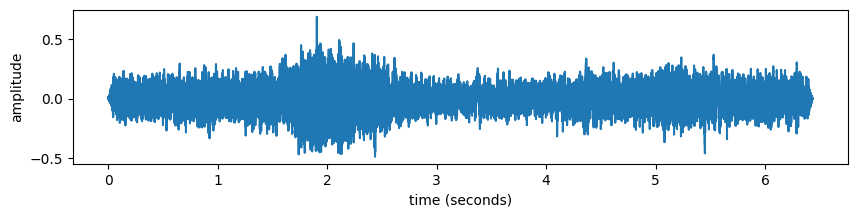

In [5]:
inputFile = '../sounds/ocean.wav'
fs, x = UF.wavread(inputFile)
plt.figure(0, figsize=(10, 2))
time_indexes = np.linspace(0, x.size/fs, x.size)
plt.plot(time_indexes, x)
plt.xlabel('time (seconds)')
plt.ylabel('amplitude')
plt.show()
ipd.display(ipd.Audio(data=x, rate=fs))

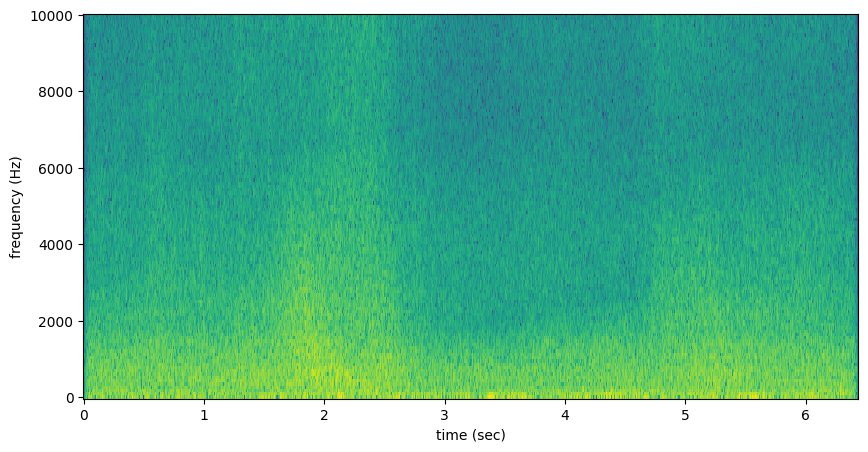

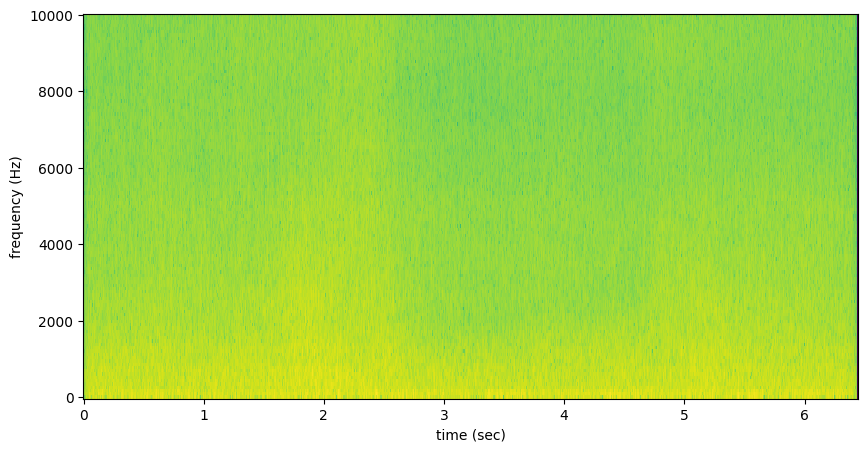

In [4]:
H=256
N=512
stocf=0.1
melScale=1
normalization=1

stocEnv = STM.stochasticModelAnal(x, H, N, stocf, fs, melScale)
y = STM.stochasticModelSynth(stocEnv, H, N, fs, melScale)

if normalization == 1:
    y = y * max(x) / max(y)

plt.figure(figsize=(10, 5))
maxplotfreq = 10000.0
mX, pX = STFT.stftAnal(x, get_window('hann', N), N, H)
numFrames = int(mX[:, 0].size)
frmTime = H * np.arange(numFrames) / float(fs)
binFreq = fs * np.arange(N * maxplotfreq / fs) / N
plt.pcolormesh(frmTime, binFreq, np.transpose(mX[:, : int(N * maxplotfreq / fs + 1)]))
plt.xlabel("time (sec)")
plt.ylabel("frequency (Hz)")
plt.autoscale(tight=True)
plt.show()

plt.figure(figsize=(10, 5))
# plot the output sound
mY, pY = STFT.stftAnal(y, get_window('hann', N), N, H)
numFrames = int(mY[:, 0].size)
frmTime = H * np.arange(numFrames) / float(fs)
binFreq = fs * np.arange(N * maxplotfreq / fs) / N
plt.pcolormesh(frmTime, binFreq, np.transpose(mY[:, : int(N * maxplotfreq / fs + 1)]))
plt.xlabel("time (sec)")
plt.ylabel("frequency (Hz)")
plt.autoscale(tight=True)
plt.show()

ipd.display(ipd.Audio(data=x, rate=fs))